<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.976818,86.610330,0.000879,155.588028,155.586164,0.001864
1,0.0,1.0,98.733817,91.747861,-0.000851,200.480827,200.481151,-0.000325
2,0.0,2.0,85.931719,59.407702,-0.000329,155.339092,155.340169,-0.001077
3,0.0,3.0,71.806520,54.055011,-0.001436,135.860094,135.862278,-0.002184
4,0.0,4.0,63.832449,69.484090,-0.004206,143.312333,143.316433,-0.004100
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,61.324413,94.428306,0.000017,165.752737,165.752410,0.000327
19996,999.0,16.0,77.088013,58.141794,-0.002417,145.227391,145.230607,-0.003217
19997,999.0,17.0,25.398446,73.183314,0.001244,108.583004,108.582859,0.000145
19998,999.0,18.0,32.363120,95.696094,-0.002185,138.057030,138.059343,-0.002313


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.976818  86.610330  0.000879  155.588028  155.586164  0.001864
      1.0    98.733817  91.747861 -0.000851  200.480827  200.481151 -0.000325
      2.0    85.931719  59.407702 -0.000329  155.339092  155.340169 -0.001077
      3.0    71.806520  54.055011 -0.001436  135.860094  135.862278 -0.002184
      4.0    63.832449  69.484090 -0.004206  143.312333  143.316433 -0.004100
...                ...        ...       ...         ...         ...       ...
999.0 15.0   61.324413  94.428306  0.000017  165.752737  165.752410  0.000327
      16.0   77.088013  58.141794 -0.002417  145.227391  145.230607 -0.003217
      17.0   25.398446  73.183314  0.001244  108.583004  108.582859  0.000145
      18.0   32.363120  95.696094 -0.002185  138.057030  138.059343 -0.002313
      19.0   22.056655  92.633649  0.001907  124.692212  124.690722  0.001489

[20000 rows x 6 columns]

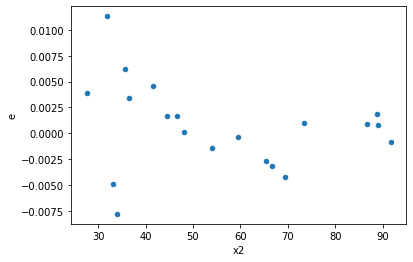

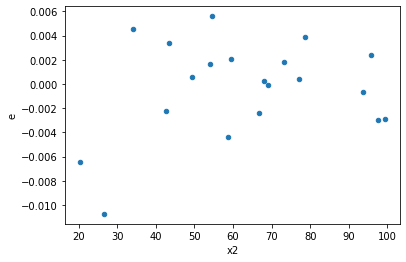

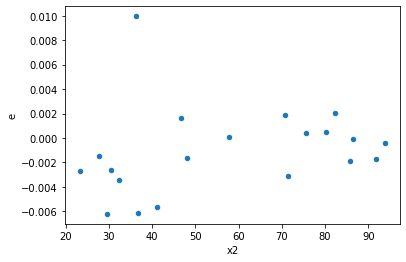

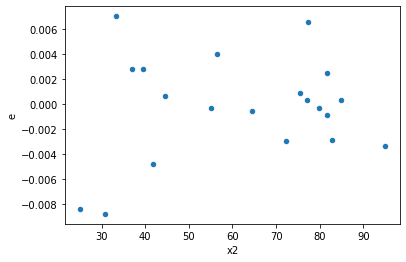

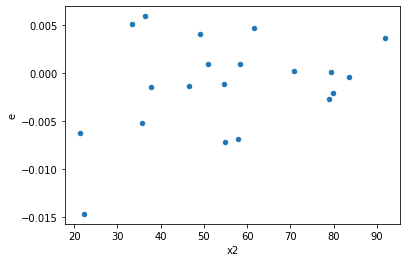

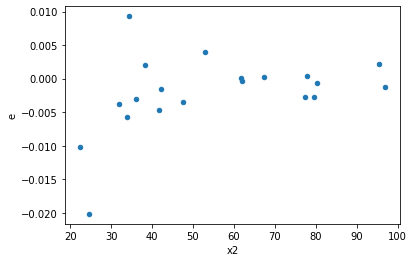

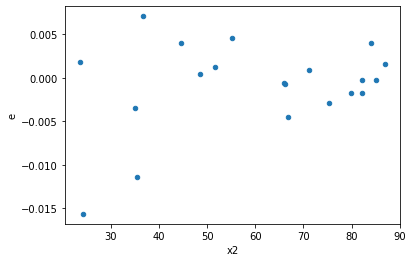

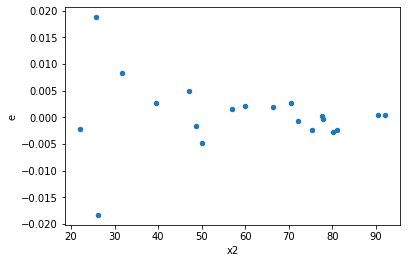

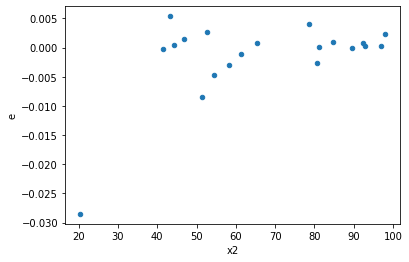

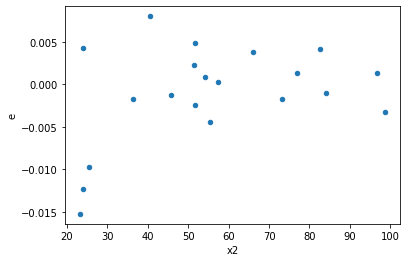

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,2.06130029972341e-05,2.761452114047452e-05,3.435500499539017e-06,4.6024201900790866e-06,1.3396651203213767,0.7315940351663817,0.6342029824168092,0.36579701758319083,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,8.191546553056001e-05,0.00010324106523407314,1.3652577588426669e-05,1.7206844205678857e-05,1.2603366722680376,0.7859471255297759,0.6070264372351121,0.39297356276488793,Reject001=1 : Homoscedasticity
21.0,6.0,6.0,4.222222230773278e-05,7.044066768852901e-05,7.037037051288796e-06,1.1740111281421502e-05,1.6683315997705828,0.5496440404221183,0.7251779797889408,0.27482202021105917,Reject001=1 : Homoscedasticity
29.0,6.0,6.0,6.95059266405631e-05,0.00010514727848803937,1.1584321106760516e-05,1.7524546414673227e-05,1.5127814787908498,0.6278603001390226,0.6860698499304887,0.3139301500695113,Reject001=1 : Homoscedasticity
33.0,6.0,6.0,0.0001448530273695263,0.00023456241816715965,2.4142171228254384e-05,3.909373636119327e-05,1.6193131923213508,0.5729185157006222,0.7135407421496889,0.2864592578503111,Reject001=1 : Homoscedasticity
47.0,6.0,6.0,3.9499213330142176e-05,5.026582074828072e-05,6.583202221690363e-06,8.37763679138012e-06,1.2725777682747534,0.7772561140032439,0.611371942998378,0.38862805700162195,Reject001=1 : Homoscedasticity
62.0,6.0,6.0,2.6641988791684325e-05,6.107982115704316e-05,4.440331465280721e-06,1.0179970192840527e-05,2.2926149258086843,0.3360456987886149,0.8319771506056926,0.16802284939430745,Reject001=1 : Homoscedasticity
76.0,6.0,6.0,1.8192225529226487e-05,5.008033640221493e-05,3.0320375882044144e-06,8.346722733702488e-06,2.7528427636167443,0.24327401706989682,0.8783629914650516,0.12163700853494841,Reject001=1 : Homoscedasticity
82.0,6.0,6.0,2.1256542317532842e-05,6.823911959686268e-05,3.5427570529221405e-06,1.1373186599477114e-05,3.2102643307410172,0.18157656256906773,0.9092117187154661,0.09078828128453387,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.00019125475435474953,5.121475681900558e-05,3.187579239245826e-05,8.535792803167596e-06,0.26778292122354097,0.13380226521420188,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,6.322223356932585e-05,5.1637812171010824e-05,1.0537038928220975e-05,8.606302028501805e-06,0.8167666540029431,0.8121719168853933,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,2.06130029972341e-05,2.761452114047452e-05,3.435500499539017e-06,4.6024201900790866e-06,1.3396651203213767,0.7315940351663817,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,7.728713944780223e-05,2.344977771738227e-05,1.2881189907967038e-05,3.908296286230378e-06,0.3034111222762961,0.17239173725384227,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,8.191546553056001e-05,0.00010324106523407314,1.3652577588426669e-05,1.7206844205678857e-05,1.2603366722680376,0.7859471255297759,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,0.00040865359397534783,2.002768606273705e-05,6.810893232922464e-05,3.3379476771228417e-06,0.04900895613790987,0.001899223339723245,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,0.0002818986731504526,3.80921930706777e-05,4.6983112191742096e-05,6.34869884511295e-06,0.13512725209014181,0.028000901954308616,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.0006738587974404777,2.1001426909377333e-05,0.00011230979957341296,3.5002378182295554e-06,0.031165916345007573,0.0005274531476900284,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,0.0003463763637028385,3.1431507952207434e-05,5.772939395047308e-05,5.238584658701239e-06,0.09074380138470707,0.010126979160526744,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      714
Reject001=0 : Heteroscedasticity    286
Name: Result_test, dtype: int64